# Villin simple design
Here we attempt to do the simplest possible modelling, which just tries to introduce new side chains at random that improve the total energy. We use the simple villin headpiece subdomain as an example. Here, the specifics for repeat proteins are not required. We use a favourite protein as a toy model.

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from repeatdesigner import designer as rd

In [3]:
helical = [4,5,6,7,8,15,16,17,22,23,24,25,26,27,28,29,30,31]
villin_des = rd.Design(pdb="pdbs/1vii.pdb", targets=helical[0:10])

 Generated new protein design 
 .. name : pdbs/1vii
 .. file : pdbs/1vii.pdb
 .. sequence : MLSDEDFKAVFGMTRSAFANLPLWKQQNLKKEKGLF
 .. target residues :  [4, 5, 6, 7, 8, 15, 16, 17, 22, 23]


In [16]:
mc_villin = rd.Optimizer(villin_des, beta=1e-3, len_mc=20, nruns=3)

In [17]:
mc_villin.run_mc()

 Run #0
MLSDEDFKAVFGMTRSAFANLPLWKQQNLKKEKGLF
7 PRO
MLSDEDFPAVFGMTRSAFANLPLWKQQNLKKEKGLF
0 atoms in HETATM/BLK residues constrained
to protein atoms within 2.30 angstroms
and protein CA atoms within 10.00 angstroms
0 atoms in residues without defined topology
constrained to be rigid bodies

>> Summary of successfully produced models:
Filename                          molpdf
----------------------------------------
/var/folders/yg/f82gg6x97m1d737h6pl80_fr0000gn/T/mut_oGCul1.fasta.B99990001.pdb      285.43594

<open file '<fdopen>', mode 'w+b' at 0x11a1e9390>
 Current energy,  -1279.37561035
MLSDEDFPAVFGMTRSAFANLPLWKQQNLKKEKGLF
8 GLY
MLSDEDFPGVFGMTRSAFANLPLWKQQNLKKEKGLF
0 atoms in HETATM/BLK residues constrained
to protein atoms within 2.30 angstroms
and protein CA atoms within 10.00 angstroms
0 atoms in residues without defined topology
constrained to be rigid bodies

>> Summary of successfully produced models:
Filename                          molpdf
------------------------------------

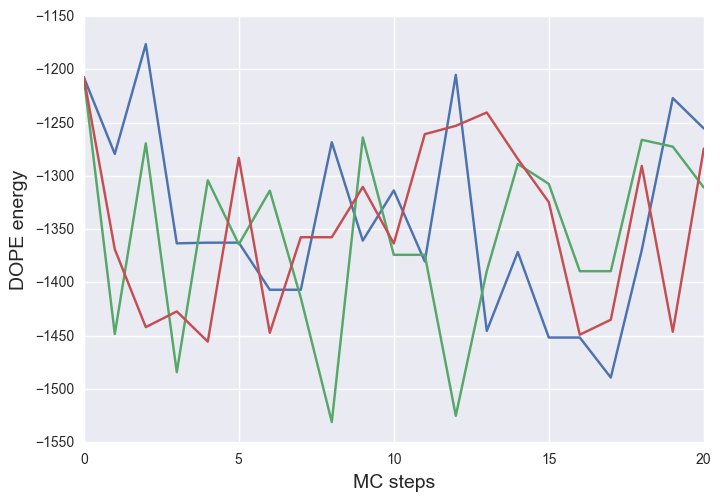

In [18]:
fig, ax = plt.subplots()
for k,v in mc_villin.models.iteritems():
    ax.plot(v['score'])

ax.set_ylabel('DOPE energy', fontsize=14)
ax.set_xlabel('MC steps', fontsize=14)

In [7]:
import Bio.PDB
import Bio.Seq
import Bio.SeqUtils
import Bio.pairwise2
import Bio.SeqRecord
import Bio.Align.AlignInfo
for k,v in mc_villin.models.iteritems():
    print "%3i %10.2f %s"%(k, v['score'][-1][0], \
        Bio.Seq.Seq(''.join([Bio.SeqUtils.seq1(x.get_resname()) \
                    for x in v['model'].get_residues()])))

  0   -1381.01 MLSDTQIEAVFGMTRNTYANLPTVKQQNLKKEKGLF
  1   -1544.79 MLSDYSAQRVFGMTRYNNANLPADKQQNLKKEKGLF
  2   -1464.52 MLSDHSNHNVFGMTRHQFANLPLMKQQNLKKEKGLF


In [15]:
sequences = [Bio.SeqRecord.SeqRecord(Bio.Seq.Seq(''.join([Bio.SeqUtils.seq1(x.get_resname()) \
                    for x in v['model'].get_residues()]))) \
             for k, v in mc_villin.models.iteritems() if v['score'][-1][0]<-1200.]
print sequences
align =  Bio.Align.MultipleSeqAlignment(sequences)
summary_align = Bio.Align.AlignInfo.SummaryInfo(align)
print villin_des.seq
print summary_align.dumb_consensus(threshold=(0.1))
print summary_align.dumb_consensus(threshold=(0.2))
print summary_align.dumb_consensus(threshold=(0.5))
print summary_align.dumb_consensus(threshold=(0.9))

[SeqRecord(seq=Seq('MLSDTQIEAVFGMTRNTYANLPTVKQQNLKKEKGLF', Alphabet()), id='<unknown id>', name='<unknown name>', description='<unknown description>', dbxrefs=[]), SeqRecord(seq=Seq('MLSDYSAQRVFGMTRYNNANLPADKQQNLKKEKGLF', Alphabet()), id='<unknown id>', name='<unknown name>', description='<unknown description>', dbxrefs=[]), SeqRecord(seq=Seq('MLSDHSNHNVFGMTRHQFANLPLMKQQNLKKEKGLF', Alphabet()), id='<unknown id>', name='<unknown name>', description='<unknown description>', dbxrefs=[])]
MLSDEDFKAVFGMTRSAFANLPLWKQQNLKKEKGLF
MLSDXSXXXVFGMTRXXXANLPXXKQQNLKKEKGLF
MLSDXSXXXVFGMTRXXXANLPXXKQQNLKKEKGLF
MLSDXSXXXVFGMTRXXXANLPXXKQQNLKKEKGLF
MLSDXXXXXVFGMTRXXXANLPXXKQQNLKKEKGLF
